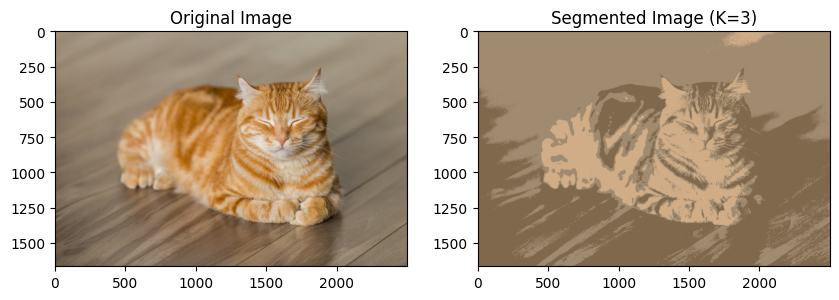

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("/content/cat.png")  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display

# Reshape the image into a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)  # Convert to float for K-Means

# Define criteria and apply K-Means
k = 3  # Number of clusters (segments)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers to 8-bit values
centers = np.uint8(centers)

# Map labels to colors
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title(f"Segmented Image (K={k})")

plt.show()
